# This notebook is made to visualize differential equations
---

## In particular we will focus on second order differential equations

##### Our differential equation can be written as follows:
> With _a_ and _b_ as parameters

$$
\begin{cases}
    \dot{x} = x(3 - ax - by) \\
    \dot{y} = y(2 - x - y)
\end{cases}
$$

---

### The analysis will be done in the following points:

1. [Visualizing the vecotor field](#Visualizing_the_vecotor_field)
2. [Simulating the trajectories](#Simulating_the_trajectories)
3. [Analyzing non-linear parts of the manifold](#Analyzing_non-linear_parts_of_the_manifold)

---

The differential equation rappresents two populations, one of rabbits and on of sheeps ....

#### Discussing our calculation

showcase what devid did and find the fixed points

Indeed we can see that on the isoclines the vectors have only one direction, since the other is null

In [11]:
def eq_diff(x,y,a,b):
    u = x * (3 - a * x - b * y)
    v = y * (2 - x - y)
    return (u,v)

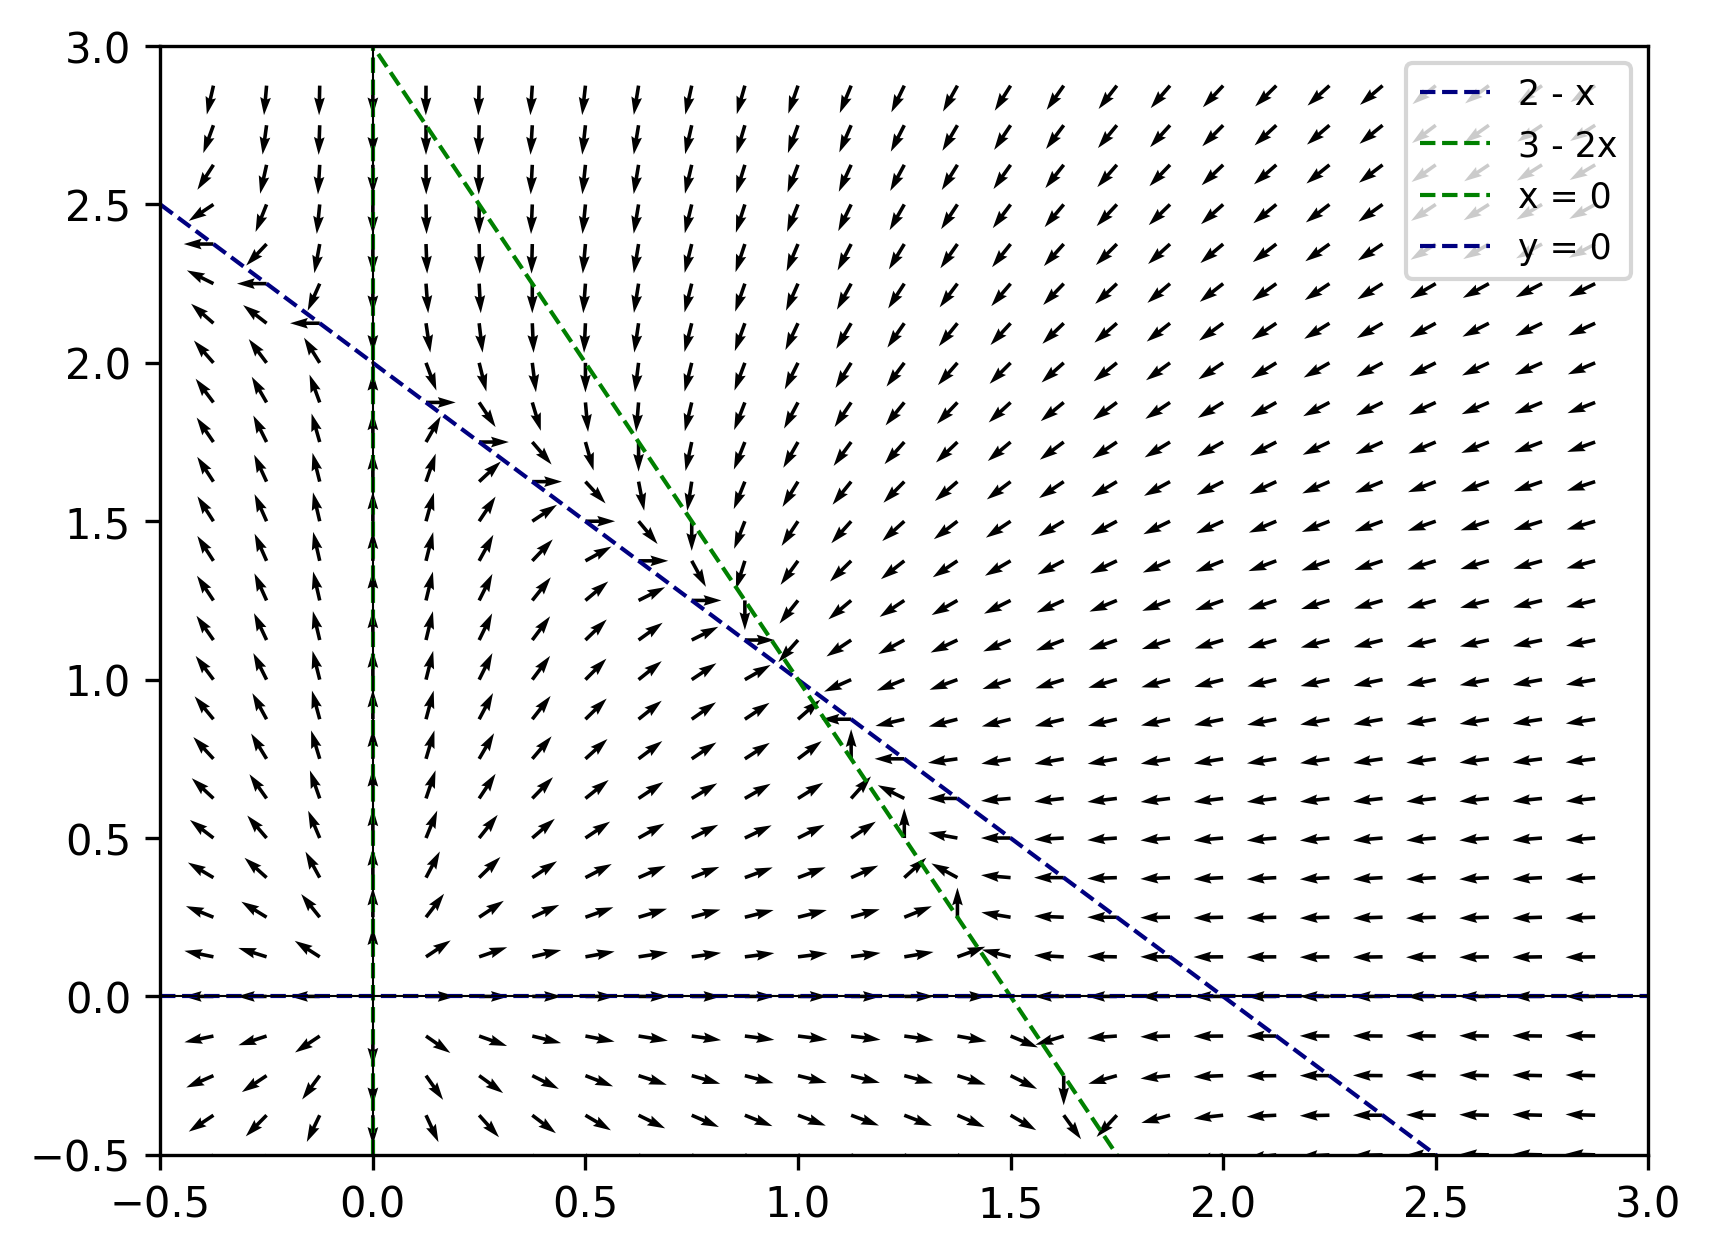

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

# Set the DPI of the figure
plt.rcParams['figure.dpi'] = 300

def update_plot(a=2, b=1, size=0.125):
    # Generate some random data
    x, y = np.meshgrid(np.arange(-0.5, 3, size), np.arange(-0.5, 3, size))
    u, v = eq_diff(x,y,a,b)

    # Calculate the magnitude of each vector and clip it so that we can get better coloring
    mag = np.clip(np.sqrt(u**2 + v**2), -10, 2)

    # Normalize the vectors
    norm = np.sqrt(u**2 + v**2)
    u = np.divide(u, norm, out=np.zeros_like(u), where=norm!=0)
    v = np.divide(v, norm, out=np.zeros_like(v), where=norm!=0)

    # Create the plot
    fig, ax = plt.subplots()

    # Add isoclines
    x_isocline = np.linspace(-0.5, 3, 100)
    y_isocline1 = 3 - 2 * x_isocline
    y_isocline2 = 2 - x_isocline

    ax.plot(x_isocline, y_isocline2, color='navy', linestyle='--', label='2 - x', linewidth=1)
    ax.plot(x_isocline, y_isocline1, 'g--', label='3 - 2x', linewidth=1)
    ax.axvline(x=0, color='g', linestyle='--', label='x = 0', linewidth=1)
    ax.axhline(y=0, color='navy', linestyle='--', label='y = 0', linewidth=1)

    # Add legend with smaller font size
    ax.legend(fontsize='small', loc='upper right')

    # Set axis limits
    ax.set_xlim(-0.5, 3)
    ax.set_ylim(-0.5, 3)

    # Set the colormap to 'cool'
    q = ax.quiver(x, y, u, v)

    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

    # Set the colorbar limits to the range of the magnitudes
    q.set_clim([mag.min(), mag.max()])

    plt.show()

update_plot()

### Discuss the isoclines and position of the vector based on what I wrote

So we can solve and understend where the vector should point for every direction

#### Now we find a general solution 

#### And now we find the manifolds

# Visualizing the vecotor field

### Reqiurements installation in quiet mode

In [ ]:
%pip -q install numpy
%pip -q install matplotlib
%pip -q install ipympl

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### Define the differential equation

In [1]:
def eq_diff(x,y,a,b):
    u = x * (3 - a * x - b * y)
    v = y * (2 - x - y)
    return (u,v)    

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

# Set the DPI of the figure
plt.rcParams['figure.dpi'] = 300

def update_plot(a=2, b=1, size=0.1):
    # Generate some random data
    x, y = np.meshgrid(np.arange(0, 3, size), np.arange(0, 3, size))
    u, v = eq_diff(x,y,a,b)

    # Calculate the magnitude of each vector and clip it so that we can get better coloring
    mag = np.clip(np.sqrt(u**2 + v**2), -10, 2)

    # Normalize the vectors
    norm = np.sqrt(u**2 + v**2)
    u = np.divide(u, norm, out=np.zeros_like(u), where=norm!=0)
    v = np.divide(v, norm, out=np.zeros_like(v), where=norm!=0)

    # Create the plot
    fig, ax = plt.subplots()

    # Set the colormap to 'cool'
    q = ax.quiver(x, y, u, v, mag, cmap='viridis')

    # Set the colorbar limits to the range of the magnitudes
    q.set_clim([mag.min(), mag.max()])

    # Set the colorbar ticks and labels
    cbar = plt.colorbar(q)
    cbar.set_ticks([mag.min(),(mag.min() + mag.max())/ 2, mag.max()])
    cbar.set_ticklabels(['Low', 'Medium', 'High'])
    
    plt.show()

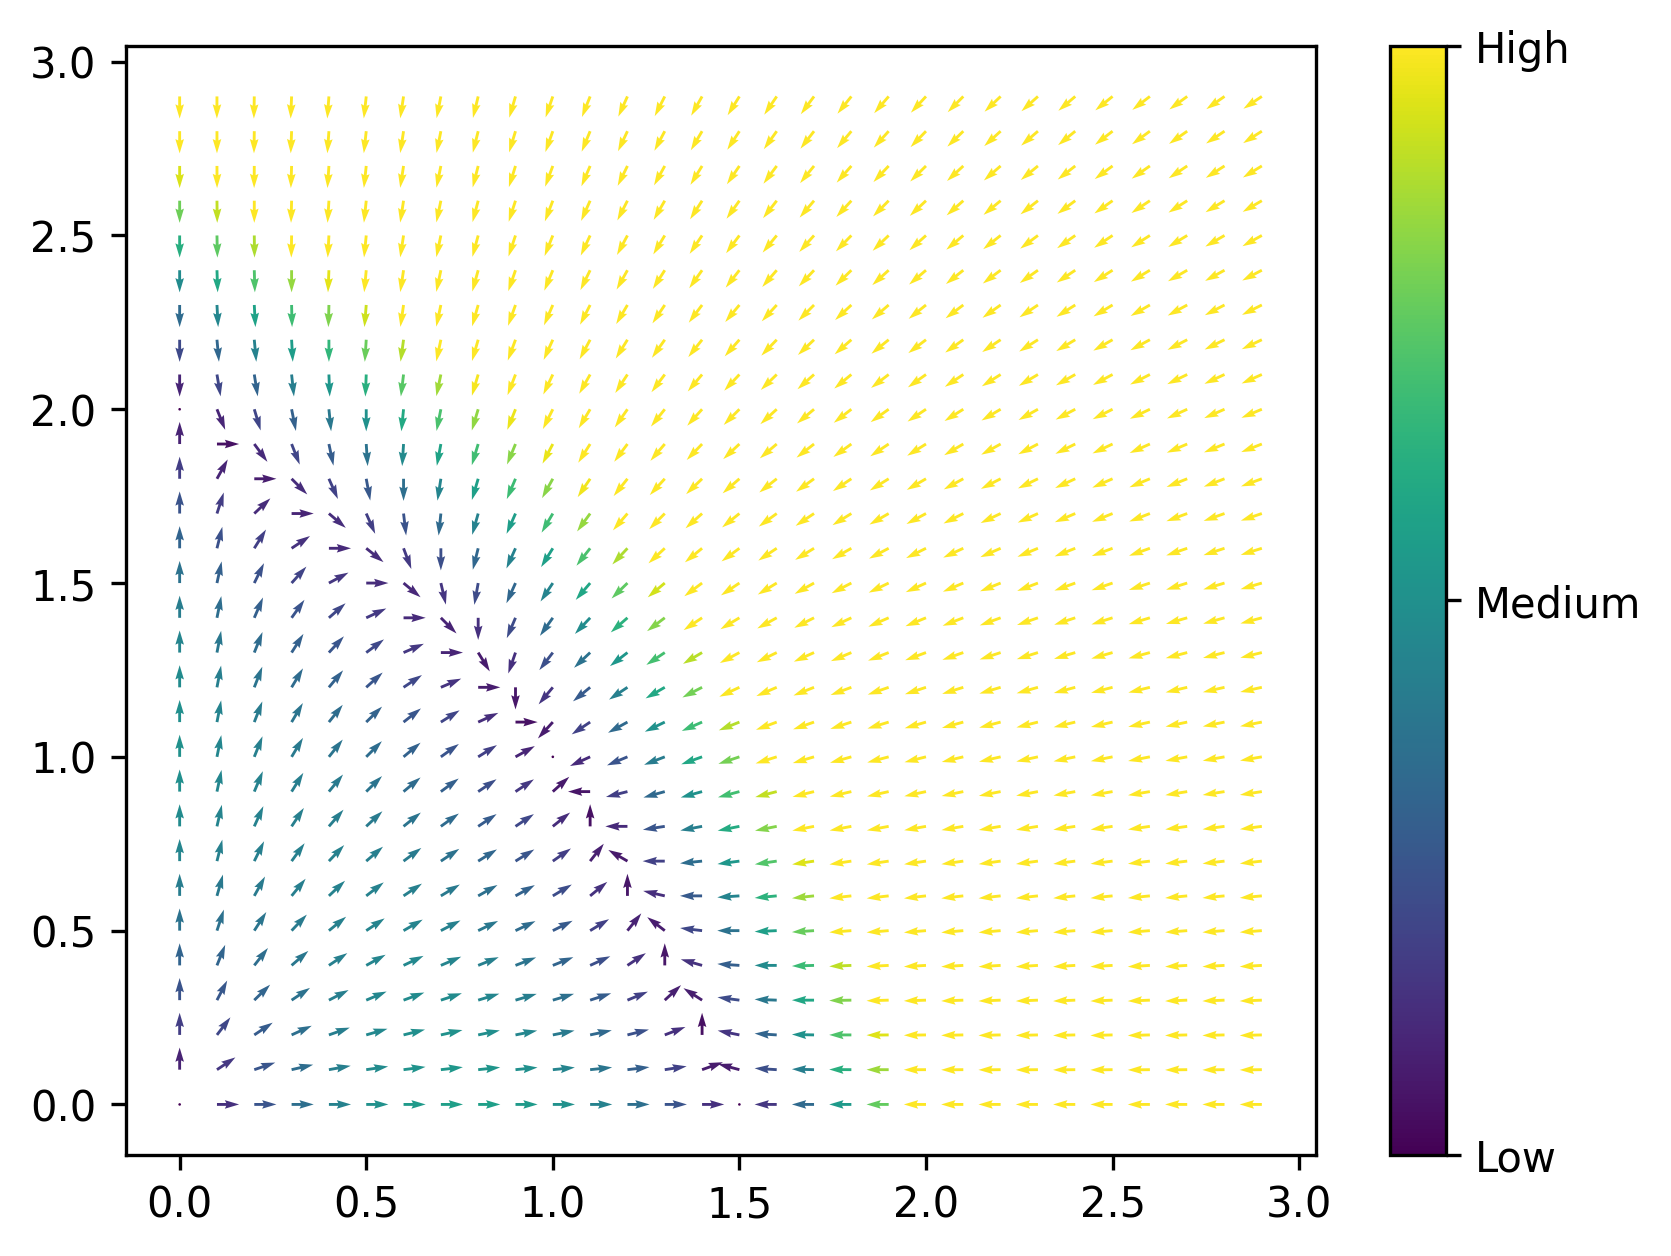

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, step=0.25), FloatSlider(value=1.0, desc…

In [7]:
a_slider = FloatSlider(min=0, max=5, step=0.25, value=2, description='a')
b_slider = FloatSlider(min=0, max=5, step=0.25, value=1, description='b')
size_slider = FloatSlider(min=0.05, max=0.2, step=0.05, value=0.1, description='size')

# Create the interactive plot
interactive(update_plot, a=a_slider, b=b_slider, size=size_slider)

#### Multiple plots for different values of a and b

In [7]:
def create_phase_diagrams(a_vals, b_vals, axs = None):    
    # Iterate over the subplots and plot a graph in each one
    for i, ax in enumerate(axs.flat):
        # Set the values of a and b based on the index i
        a = a_vals[i]
        b = b_vals[i]

        # Generate the data for the graph
        x, y = np.meshgrid(np.arange(0, 3.5, 0.1), np.arange(0, 2.5, 0.1))
        
        # unpack the return value
        u,v = eq_diff(x,y,a,b)
        
        # Calculate the magnitude and normalize the vectors
        mag = np.clip(np.sqrt(u**2 + v**2), -10, 2)
        norm = np.sqrt(u**2 + v**2)
        u = np.divide(u, norm, out=np.zeros_like(u), where=norm!=0)
        v = np.divide(v, norm, out=np.zeros_like(v), where=norm!=0)
            
        # Plot the graph using quiver plot
        q = ax.quiver(x, y, u, v, mag, cmap='Spectral_r')
        q.set_clim([mag.min(), mag.max()])
        
        # Add a colorbar to the graph
        cbar = plt.colorbar(q, ax=ax)
        cbar.set_ticks([mag.min(),(mag.min() + mag.max())/ 2, mag.max()])
        cbar.set_ticklabels(['Low', 'Medium', 'High'])
        
        # Add a title to the subplot
        ax.set_title(f'Graph values: a={a}, b={b}')

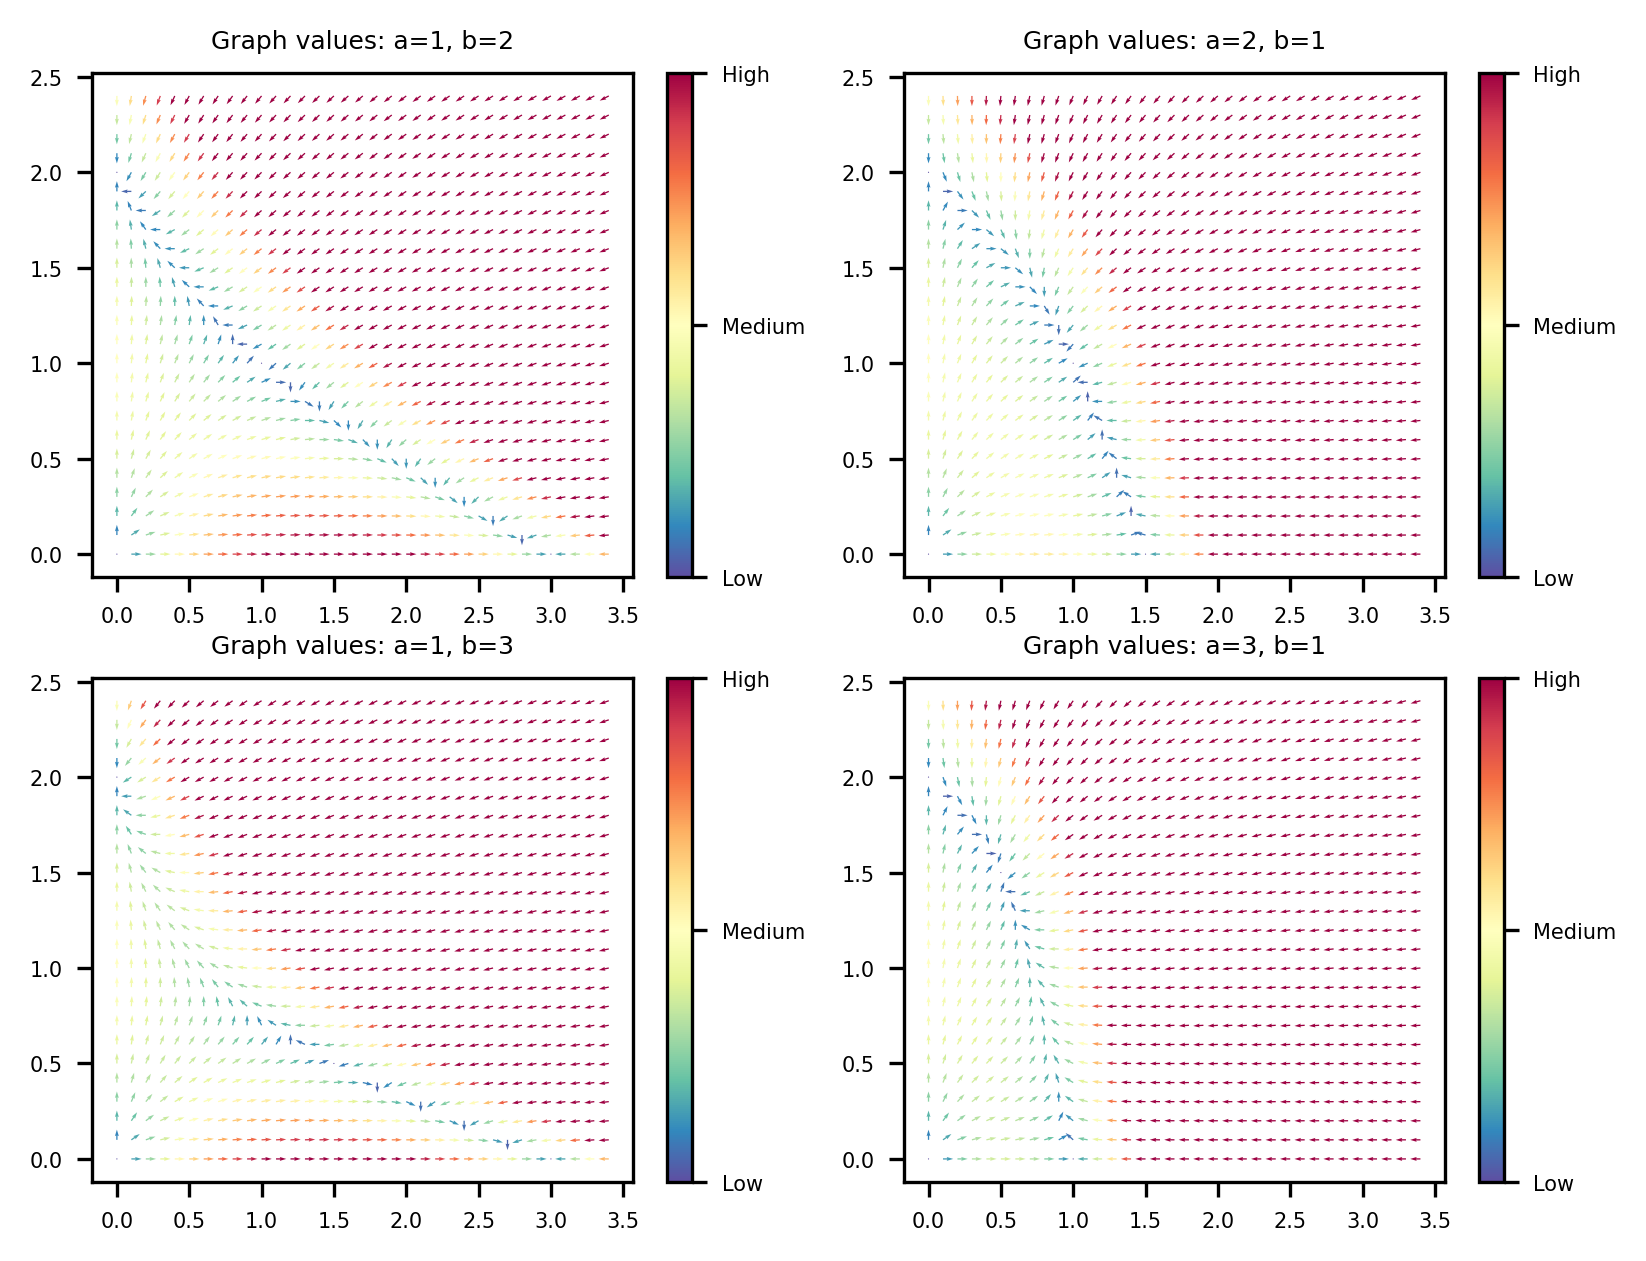

In [8]:
# Set the DPI of the figure
plt.rcParams['figure.dpi'] = 300
# Set the font size of the labels and title
plt.rcParams['font.size'] = 5

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2)

a_vals = [1, 2, 1, 3]
b_vals = [2, 1, 3, 1]

create_phase_diagrams(a_vals,b_vals,axs)

# Display the plot
plt.show()

# Simulating the trajectories

### Lets remember this is our system:

##### Our differential equation can be written as follows:
> With _a_ and _b_ as parameters

$$
\begin{cases}
    \dot{x} = x(3 - ax - by) \\
    \dot{y} = y(2 - x - y)
\end{cases}
$$


##### Install numba as a requirement to run the jit

In [ ]:
%pip -q install numba

#### Import necessary libraries and define the function

In [5]:
from numba import *
import numpy as np

# import it from the library directory
from library.eqdiff_solver import *

# remeber that x can be multi dimensional so the function is general to n dimensino
@njit(cache=True)
def f(x) -> np.ndarray[float64]:

    # Define the value for a and b
    a = 2.0
    b = 1.0

    # Define the equations
    u = x[0] * (3 - a * x[0] - b * x[1])
    v = x[1] * (2 - x[0] - x[1])
    return np.array([u, v])

# Ricorda di provare a studiare f-1

# stable manifolds become unstable and viceversa

In [5]:
def draw_trajectories(f, dt  = 0.1, final_time = 1, points = [[0, 0], [1, 1], [2, 0]], h = 0.25):
    x_starts = []
    y_starts = []

    # get ball around all the points
    for point in points:
        x_starts.append((point[0] - h, point[0] + h))
        y_starts.append((point[1] + h, point[1] - h))

    # get the array of values
    x0_array = np.array(list(zip(x_starts, y_starts))).reshape(-1, 2)

    print(x0_array.shape)

    # Initialize an array to store the trajectories
    trajectories = []

    urunge_kutta = vectorize(runge_kutta)
    trajectories = runge_kutta(f, x0_array, dt, final_time)

    # Set up the plot
    fig, ax = plt.subplots()

    # Define the color map
    cmap = plt.get_cmap("viridis")

    # Plot the trajectories for each combination of x and y
    for i in range(len(x0_array)):
        x_traj = trajectories[i][:, 0]
        y_traj = trajectories[i][:, 1]
        color = cmap(i / len(x0_array))
        ax.plot(x_traj, y_traj, color=color, linewidth=0.5)

    # Add labels and title
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(-1, 3)
    ax.set_ylim(-1, 3)
    ax.set_title("Trajectories of the Differential Equation Solution")

    # Set the background color to white
    fig.patch.set_facecolor("white")

    # Remove the top and right spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Add grid lines
    ax.grid(True, linestyle="--", color="gray", alpha=0.5)

    # Show the plot
    plt.show()


In [6]:
draw_trajectories(f=f, dt = 0.01, final_time = 10, points = [[0, 0], [1, 1], [1.5, 0]], h=0.5)

(6, 2)


ValueError: cannot broadcast source array for assignment

### Try out the varius methods

Executed 'eulero' in 0.000060 seconds
Executed 'eulero_modified' in 0.000091 seconds


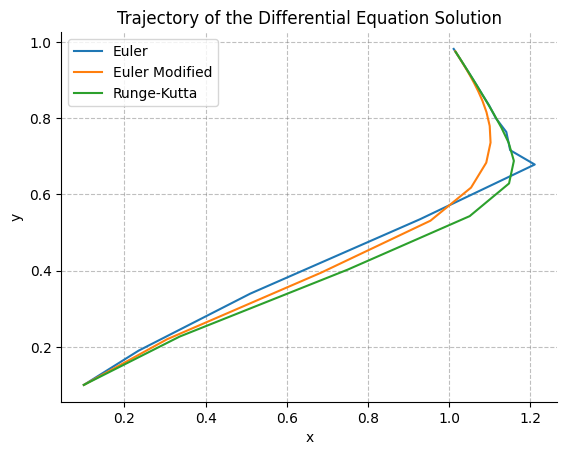

In [24]:
# Initialize an array fo yr the initial contions
x0 = np.array([0.1, 0.1])
# Delta time
dt = 0.5
# Final time
final_time = 10

# The number of step is automatically computed the function is also inside eqdiff_solver
x = plot_solution(f, x0, dt=dt, final_time=final_time, rk_only= False)

## Analyzing the manifold trajectories

In [ ]:
# Delta time
dt = 0.001

# Final time
final_time = 10

# The number of step is automatically computed the function is also inside eqdiff_solver
phase_diagram_trajectories(f, dt=dt, final_time=final_time, num=25, start=-0, end=3.5)

# Close all open figures
# plt.close('all')

### Lets remember this is our system

##### The inverse of the system we had is
> With _a_ and _b_ as parameters

$$
\begin{cases}
    \dot{x} = \frac{3 - by}{2a} \pm \frac{\sqrt{\left(by - 3\right)^2 - 4ax}}{2a}\\
    \dot{y} = \frac{(-x + 2 y - y^2)}{y}
\end{cases}
$$


In [ ]:
def eq_diff_inverse(x,y,a,b):
    u = x * (3 - b * y)/(2 * a) + np.sqrt((b * y - 3)**2 - 4 * a * x)/(2 * a)
    v = y * (-y**2 + 2 * y - x)/y
    return (u,v)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

# Set the DPI of the figure
plt.rcParams['figure.dpi'] = 150

def update_plot(a=1, b=2, size=0.1, colormap='viridis'):
    # Generate some random data
    x, y = np.meshgrid(np.arange(0, 3.5, size), np.arange(0, 2.5, size))
    u, v = eq_diff_inverse(x,y,a,b)

    # Calculate the magnitude of each vector and clip it so that we can get better coloring
    mag = np.clip(np.sqrt(u**2 + v**2), -10, 2)

    # Normalize the vectors
    norm = np.sqrt(u**2 + v**2)
    u = np.divide(u, norm, out=np.zeros_like(u), where=norm!=0)
    v = np.divide(v, norm, out=np.zeros_like(v), where=norm!=0)
    
    # Create the plot
    fig, ax = plt.subplots()

    # Set the colormap to 'cool'
    q = ax.quiver(x, y, u, v, mag, cmap=colormap)

    # Set the colorbar limits to the range of the magnitudes
    q.set_clim([mag.min(), mag.max()])

    # Set the colorbar ticks and labels
    cbar = plt.colorbar(q)
    cbar.set_ticks([mag.min(),(mag.min() + mag.max())/ 2, mag.max()])
    cbar.set_ticklabels(['Low', 'Medium', 'High'])
    
    plt.show()

Executed 'eulero' in 0.178265 seconds
Executed 'eulero_modified' in 0.163951 seconds


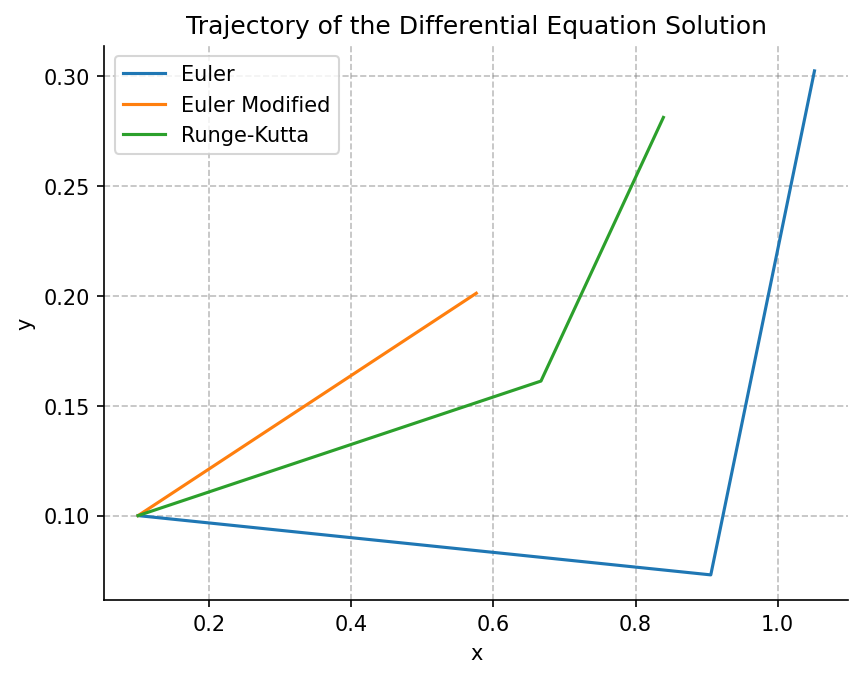

In [8]:
# g = f^-1
from numba import *
import numpy as np

@njit(cache=True)
def g(x) -> np.ndarray[float64]:

    # Define the value for a and b
    a = 2.0
    b = 1.0

    # Define the equations
    u = x[0] * (3 - b * x[1])/(2*a) - np.sqrt((b*x[1] - 3)**2 - 4 * a * x[0])/2*a

    v = x[1] * (-x[0] + 2 * x[1] - x[1]**2)/x[1] if (x[0] != 0) else 0
    return np.array([u, v])

x0 = np.array([0.1,0.1])

# Delta time
dt = -0.3

# Final time
final_time = -10

x = plot_solution(g, x0, dt=dt, final_time=final_time, rk_only= False)
# The number of step is automatically computed the function is also inside eqdiff_solver

# Close all open figures
#plt.close('all')
x

## Analyzing the non linear extension of the manifold

In [7]:
# Delta time
dt = 0.001

# Final time
final_time = 10

# The number of step is automatically computed the function is also inside eqdiff_solver
phase_diagram_trajectories(g, dt=dt, final_time=final_time, num=45, start=-10, end=10)
#phase_diagram_trajectories(f, dt=dt, final_time=final_time, num=45, start=-4, end=4)
# Lets study the inverse in time also
phase_diagram_trajectories(g, dt=-dt, final_time=-final_time, num=45, start=-10, end=10)


# Close all open figures
plt.close('all')

ZeroDivisionError: division by zero